<a href="https://colab.research.google.com/github/innosevda/Data-Science-CRN-20018/blob/main/Homework9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#First execute this cell go to Runtime and click on Restart Runtime
!pip install --upgrade --no-deps statsmodels
!pip install  StatsForecast

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.4/354.4 kB 8.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.8/285.8 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.2/278.2 kB 19.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.3/135.3 kB 9.5 MB/s eta 0:00:00


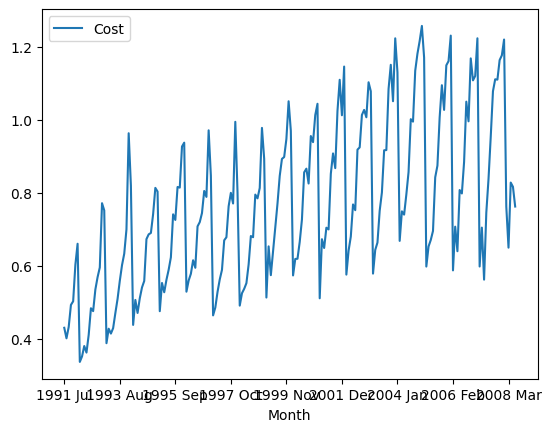

In [ ]:
import pandas as pd
from matplotlib import pyplot
ap1=pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/h02.csv')
ap1=ap1.set_index('Month')
ap1.plot()
pyplot.show()


In [ ]:
ap1

,Cost
Month,
1991 Jul,0.429795
1991 Aug,0.400906
1991 Sep,0.432159
1991 Oct,0.492543
1991 Nov,0.502369
...,...
2008 Feb,0.761822
2008 Mar,0.649435
2008 Apr,0.827887


Using the above data set

1)Test stationary of the dataset.Write hypothesis. What is your conclusion at 5% siginifance level?

2)Take difference and seasonal difference and test stationay of the dataset.Write hypothesis. What is your conclusion at 5% siginifance level?

3) Plot ACF and PACF of series if series' difference and seasonal difference taken .

4) Based on the plot of ACF and PACF, come up with two SARIMA model and compare their Akaike Information Criterion metric.

5)Split data into train and test. For the test data, use last 12 months observation.

6)Plot test, train and forecast values for the SARIMA model chosen at Q4. Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

7) Using the Statsforecast library, implement the following models: AutoARIMA, AutoETS, HoltWinters,  AutoTheta, and MSTL and plot the forecast of this model .Evaluate the performance of these model model using  MSE (Mean Squared Error).Note that seasonality period is 12.


In [ ]:
"""
1st Task: Using ADF test we can determine whether the dataset is stationary or not.

Hypotheses:
H₀: The data is non-stationary, if p-value is >= 0.05 (5% signifance level).

"""
from statsmodels.tsa.stattools import adfuller

result = adfuller(ap1)

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])


ADF Statistic: -1.6967562070359845
p-value: 0.43278454683042955
Critical Values: {'1%': np.float64(-3.465620397124192), '5%': np.float64(-2.8770397560752436), '10%': np.float64(-2.5750324547306476)}


Our p-value is 0.4327 which is less than 5, so the data is stationary. We fail to reject H₀.

In [ ]:
"""
2nd Task:
First-order differencing removes trend, second-order differencing removes seasonality.
"""

# First-order difference and seasonal difference (s=12 -> monthly data)
combined_diff = ap1.diff().diff(12).dropna()

# H₀: The data is non-stationary, if p-value is >= 0.05 (5% signifance level).

In [ ]:
result = adfuller(combined_diff)

print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -5.07040327971582
p-value: 1.607283495966982e-05


At the 5% significance level, we reject the null hypothesis and conclude that the differenced (trend + seasonal) data is stationary.

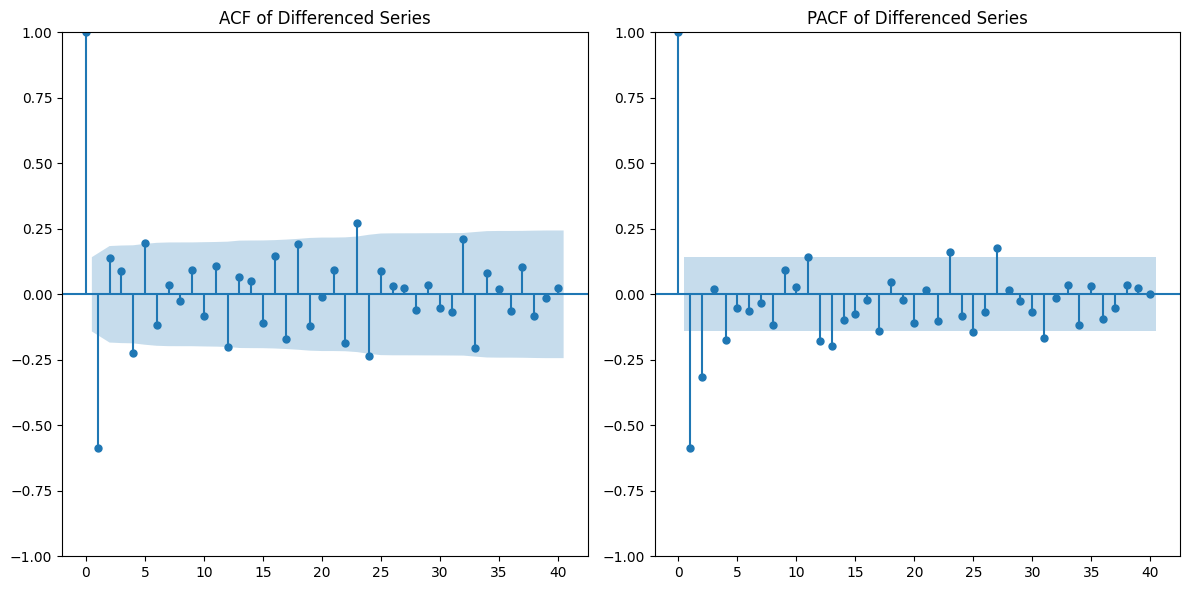

In [ ]:
# 3rd Task: Plotting ACF and PACF

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import matplotlib.pyplot as plt

# Set up the plots
plt.figure(figsize=(12, 6))

# Plot ACF
plt.subplot(1, 2, 1)
plot_acf(combined_diff, lags=40, ax=plt.gca())
plt.title('ACF of Differenced Series')

# Plot PACF
plt.subplot(1, 2, 2)
plot_pacf(combined_diff, lags=40, ax=plt.gca(), method='ywm')
plt.title('PACF of Differenced Series')

plt.tight_layout()
plt.show()


In [ ]:
# 4th Task:

from statsmodels.tsa.statespace.sarimax import SARIMAX

# Model 1
model1 = SARIMAX(ap1, order=(1,1,1), seasonal_order=(0,1,1,12)).fit()
print("Model 1 AIC:", model1.aic)

# Model 2
model2 = SARIMAX(ap1, order=(1,1,1), seasonal_order=(1,1,0,12)).fit()
print("Model 2 AIC:", model2.aic)


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Model 1 AIC: -555.8775276423394


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:559: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  _index = to_datetime(index)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Model 2 AIC: -542.4091821562336


Model 1: SARIMA(1,1,1)(0,1,1,12)

AIC = -555.88

Model 2: SARIMA(1,1,1)(1,1,0,12)

AIC = -542.41

Since lower AIC is better, Model 1 is preferred over Model 2.

In [ ]:
# 5)Split data into train and test. For the test data, use last 12 months observation.

